<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/pytorch_0417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

간단한 선형회귀 예제
Iris data를 활용하여 sepal length, sepal width, petal length의 변화에 따른 petal width 구하기!!!

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
df = load_iris()
df

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [2]:
# 데이터프레임형식으로 변환
df=pd.DataFrame(data=df['data'],columns=df['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
#150 x 4라는 아주 작은 데이터셋 
#x는 모든행을 불러오고 마지막 petal width를 제외하고 불러오고, y는 모든행을 가진 petal width열만
x,y=df.values[:,:-1],df.values[:,-1:]
x.shape, y.shape

((150, 3), (150, 1))

커스텀 데이터셋 만들기

In [0]:
#필요한 라이브러리 불러오기 

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [0]:
class Iris():
    def __init__(self):
        self.x_data = torch.FloatTensor(x)
        self.y_data = torch.FloatTensor(y)
    
    def __len__(self):
        return len(self.x_data)
  
    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

In [0]:
dataset=Iris()
dataloader=DataLoader(dataset,batch_size=len(dataset),shuffle=True) 

In [7]:
dataset.__getitem__(0) , dataset.__len__()  #총 샘플의수 150개 0번째 샘플의 x는 5.1,3.5,1.4 y는 0.2

((tensor([5.1000, 3.5000, 1.4000]), tensor([0.2000])), 150)

In [0]:
model = nn.Linear(3,1)      #input 3 ouput 1
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
nb_epochs=100
train_losses=[]
for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        

        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)



        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))



Epoch    0/100 Batch 1/1 Cost: 6.888920
Epoch    1/100 Batch 1/1 Cost: 1.071438
Epoch    2/100 Batch 1/1 Cost: 0.755789
Epoch    3/100 Batch 1/1 Cost: 0.692778
Epoch    4/100 Batch 1/1 Cost: 0.644784
Epoch    5/100 Batch 1/1 Cost: 0.600796
Epoch    6/100 Batch 1/1 Cost: 0.560072
Epoch    7/100 Batch 1/1 Cost: 0.522350
Epoch    8/100 Batch 1/1 Cost: 0.487409
Epoch    9/100 Batch 1/1 Cost: 0.455043
Epoch   10/100 Batch 1/1 Cost: 0.425063
Epoch   11/100 Batch 1/1 Cost: 0.397291
Epoch   12/100 Batch 1/1 Cost: 0.371566
Epoch   13/100 Batch 1/1 Cost: 0.347737
Epoch   14/100 Batch 1/1 Cost: 0.325662
Epoch   15/100 Batch 1/1 Cost: 0.305214
Epoch   16/100 Batch 1/1 Cost: 0.286272
Epoch   17/100 Batch 1/1 Cost: 0.268725
Epoch   18/100 Batch 1/1 Cost: 0.252471
Epoch   19/100 Batch 1/1 Cost: 0.237413
Epoch   20/100 Batch 1/1 Cost: 0.223463
Epoch   21/100 Batch 1/1 Cost: 0.210541
Epoch   22/100 Batch 1/1 Cost: 0.198569
Epoch   23/100 Batch 1/1 Cost: 0.187479
Epoch   24/100 Batch 1/1 Cost: 0.177204


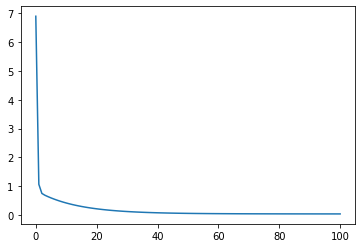

In [10]:
#epoch에 따른 train_losses 변화

import matplotlib.pyplot as plt

plt.plot(train_losses)
plt.show()

In [11]:
new_var=torch.FloatTensor([[6.9,2.0,7.1]]) 
pred_y=model(new_var)

print('훈련 후 입력이 6.9, 2.0, 7.1 일때의 예측값: ',pred_y)

훈련 후 입력이 6.9, 2.0, 7.1 일때의 예측값:  tensor([[2.5981]], grad_fn=<AddmmBackward>)
